# Sharpe

### About Sharpe
The Sharpe Ratio is a method to evaluate an asset's return in relation to it's risk. It is doing so by dividing the "exess return" by it's standard deviation. The "exess return" is the difference of the average return to the one of a "risk free" asses (such as US Government Bonds).

<img src="https://www.myaccountingcourse.com/wp-content/uploads/2017/10/sharpe-ratio-formula.jpg" width="750">

The below chart illustrates an example.

<img src="http://www.marottaonmoney.com/wp-content/uploads/2017/09/chile-sharpe.jpg" width="750">


### Objective
The goal is to make use of the Sharpe Ratio to improve the balace of a portfolio.
General guiding principles:
- The higher the Sharpe ratio, the better
- Rule of thumb: Sharpe Ratio < 0 => Not a good investment
- Rule of thumb: Sharpe Ratio >= 0 < 1 => Potentially a good investment
- Rule of thumb: Sharpe Ratio >= 1 => A good investment


### Approach
1. Import libraries
2. Data and data preparation
3. Exploratory data analysis
4. Calculating the Sharpe Ratio
5. Using Sharpe Ratio for portfolio balancing

## 1. Importing Libraries

In [1]:
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Data

In [2]:
tickers = ['XIC.TO', '^GSPC', 'SHOP', 'TSLA', 'VFV.TO', 'VDY.TO', 'HXQ.TO', 'XMH.TO', 'ZFL.TO']
start = dt.datetime(2018, 12, 30)
end = dt.datetime(2021, 12, 30)
df_stocks = pdr.get_data_yahoo(tickers, start, end, interval="d")

df_stocks = df_stocks['Adj Close']

df_stocks

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO
Date,,,,,,,,,
2018-12-31,20.929350,2506.850098,138.449997,66.559998,58.090946,26.368473,12.005000,15.532483,15.984071
2019-01-02,20.938534,2510.030029,137.600006,62.023998,58.119770,26.553055,12.055000,15.571314,16.131483
2019-01-03,20.727310,2447.889893,129.789993,60.071999,56.198452,26.403639,11.600000,15.425697,16.352581
2019-01-04,21.067104,2531.939941,138.059998,63.537998,57.821957,26.764000,12.007500,15.920795,16.168331
2019-01-07,21.168123,2549.689941,144.389999,66.991997,57.783535,26.834322,12.062500,16.076120,16.094625
...,...,...,...,...,...,...,...,...,...
2021-12-24,33.939999,NaN,NaN,NaN,107.730003,43.009998,59.110001,26.020000,17.817001
2021-12-27,NaN,4791.189941,1400.589966,1093.939941,NaN,NaN,NaN,NaN,NaN
2021-12-28,NaN,4786.350098,1375.619995,1088.469971,NaN,NaN,NaN,NaN,NaN


In [3]:
# Checking how many missing NaN
df_stocks.isna().sum()

Symbols
XIC.TO    16
^GSPC     13
SHOP      13
TSLA      13
VFV.TO    16
VDY.TO    16
HXQ.TO    16
XMH.TO    16
ZFL.TO    16
dtype: int64

In [4]:
# Checking if there are double-dates (divident stocks might show date a second time for the divident value)
print(df_stocks.index.has_duplicates)
print(df_stocks.index.nunique())
print(len(df_stocks))

False
770
770


In [5]:
# No duplicated dates
# 1.9% NaN for specific stocks; it is not a big impact to fill these gaps
df_stocks.fillna(method="ffill", inplace=True)
df_stocks

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO
Date,,,,,,,,,
2018-12-31,20.929350,2506.850098,138.449997,66.559998,58.090946,26.368473,12.005000,15.532483,15.984071
2019-01-02,20.938534,2510.030029,137.600006,62.023998,58.119770,26.553055,12.055000,15.571314,16.131483
2019-01-03,20.727310,2447.889893,129.789993,60.071999,56.198452,26.403639,11.600000,15.425697,16.352581
2019-01-04,21.067104,2531.939941,138.059998,63.537998,57.821957,26.764000,12.007500,15.920795,16.168331
2019-01-07,21.168123,2549.689941,144.389999,66.991997,57.783535,26.834322,12.062500,16.076120,16.094625
...,...,...,...,...,...,...,...,...,...
2021-12-24,33.939999,4725.790039,1439.329956,1067.000000,107.730003,43.009998,59.110001,26.020000,17.817001
2021-12-27,33.939999,4791.189941,1400.589966,1093.939941,107.730003,43.009998,59.110001,26.020000,17.817001
2021-12-28,33.939999,4786.350098,1375.619995,1088.469971,107.730003,43.009998,59.110001,26.020000,17.817001


In [6]:
df_stocks.describe()

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,26.681661,3466.730568,810.516663,374.468875,78.775695,32.605373,24.247075,20.089247,18.002540
std,3.729277,639.545125,474.775601,331.263567,13.097894,4.960796,14.269414,3.659899,1.156831
min,17.018469,2237.399902,129.789993,35.793999,56.198452,20.558222,11.600000,10.966601,15.845883
25%,24.155900,2934.704956,329.677505,62.473501,67.628752,29.134980,14.584375,17.669710,17.142757
50%,25.432117,3275.359985,909.304993,232.828995,75.942455,31.258361,19.622499,18.582990,17.764738
75%,29.866412,4052.247559,1199.614960,669.634995,88.205769,36.721581,23.503749,24.426452,19.067129
max,34.689999,4801.180176,1690.599976,1229.910034,109.089996,43.369999,59.660000,27.100000,20.632425


In [7]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 770 entries, 2018-12-31 to 2021-12-30
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XIC.TO  770 non-null    float64
 1   ^GSPC   770 non-null    float64
 2   SHOP    770 non-null    float64
 3   TSLA    770 non-null    float64
 4   VFV.TO  770 non-null    float64
 5   VDY.TO  770 non-null    float64
 6   HXQ.TO  770 non-null    float64
 7   XMH.TO  770 non-null    float64
 8   ZFL.TO  770 non-null    float64
dtypes: float64(9)
memory usage: 76.3 KB


## 3. Exploratory Data Analysis

Questions to investigate:
- Any major events?
- Correlations?
- Best performance, worst performance

In [11]:
# Let's create a function that can plot a dataset
def plot_that_chart(df, title):
    df.plot(title=title, figsize=(20, 7))
    plt.grid()

    plt.show();

### Trends

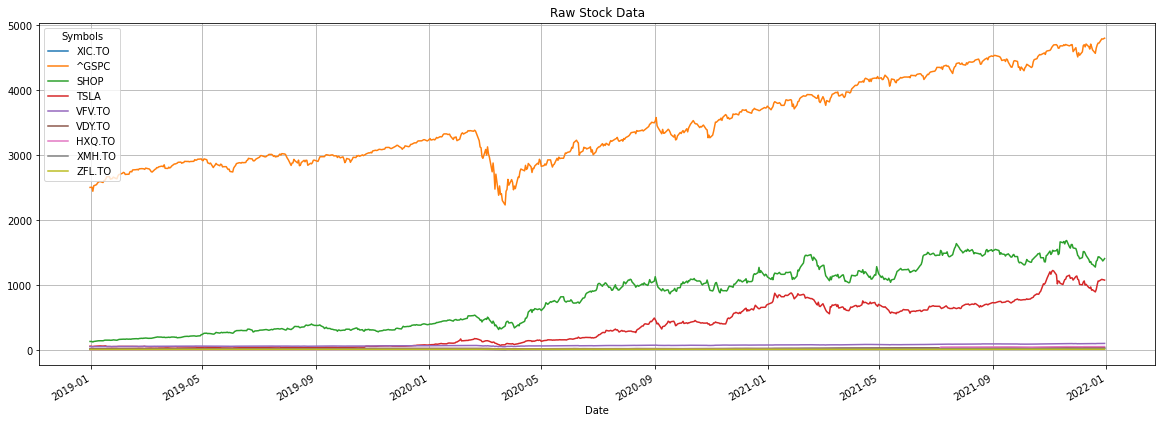

In [12]:
plot_that_chart(df_stocks, 'Raw Stock Data')

The chart is dominated by the Index, S&P 500. To get a clearer picture, the data will be normalized.

In [16]:
# Scaling to first closing values
df_stocks_normalized = df_stocks / df_stocks.iloc[0]
df_stocks_normalized

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO
Date,,,,,,,,,
2018-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-02,1.000439,1.001268,0.993861,0.931851,1.000496,1.007000,1.004165,1.002500,1.009222
2019-01-03,0.990347,0.976480,0.937450,0.902524,0.967422,1.001334,0.966264,0.993125,1.023055
2019-01-04,1.006582,1.010009,0.997183,0.954597,0.995370,1.015000,1.000208,1.025000,1.011528
2019-01-07,1.011409,1.017089,1.042904,1.006490,0.994708,1.017667,1.004790,1.035000,1.006917
...,...,...,...,...,...,...,...,...,...
2021-12-24,1.621646,1.885151,10.396027,16.030650,1.854506,1.631114,4.923782,1.675199,1.114672
2021-12-27,1.621646,1.911239,10.116215,16.435396,1.854506,1.631114,4.923782,1.675199,1.114672
2021-12-28,1.621646,1.909308,9.935862,16.353215,1.854506,1.631114,4.923782,1.675199,1.114672


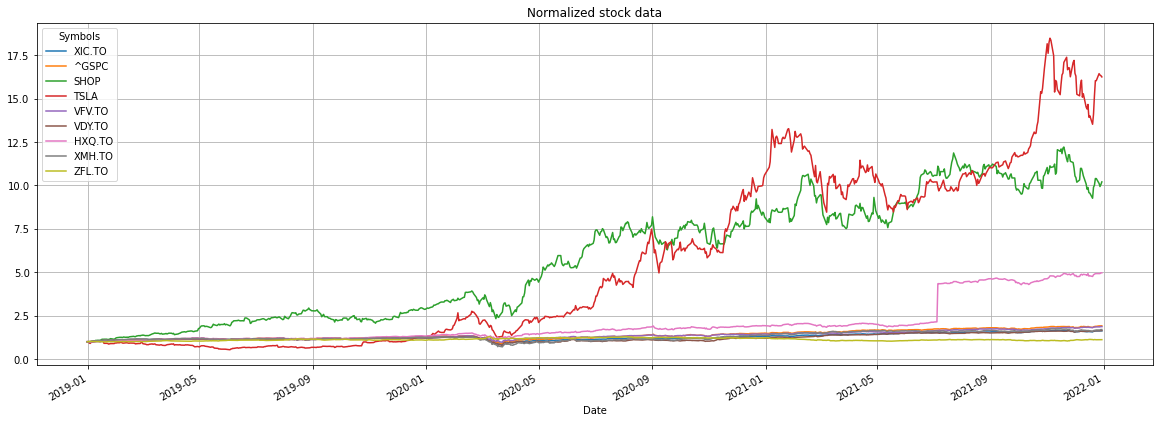

In [18]:
# Plot the normalized stock data
plot_that_chart(df_stocks_normalized, 'Normalized stock data')

The above chart shows that Shopify and Tesla are the big winners over the observed time period. There are two major peaks, followed by drops. In order to see if the rest of the market followed the same trend these two dominating stocks and HXQ need to be removed.

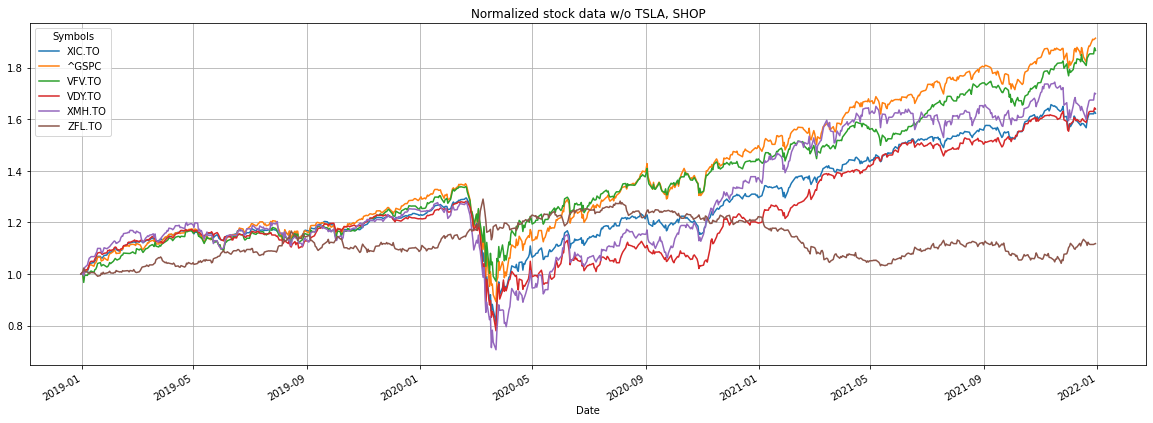

In [20]:
plot_that_chart(df_stocks_normalized.drop(['TSLA', 'SHOP', 'HXQ.TO'], axis=1), 'Normalized stock data w/o TSLA, SHOP')

Interestingly, we don't see the observed peaks and valleys of TSLA and SHOP in the rest of the listed shares. ZFL shows a trend that seems to be developing independent from the market. This may be the case because Real Estate is a completely diverent market sector. There is a major drop in April 2021.

### Correlations
We would like to see if daily returns of stocks correlate to each other.

In [25]:
def calc_return(df):
    '''Function to generate a detaframe with returns
    - Input: Dataframe with raw stock data
    - Output: Dataframe with returns'''

    x = df.copy()
    
    for i in range(1, len(df)):
        x.iloc[i] = (df.iloc[i] - df.iloc[i-1]) / df.iloc[i-1] * 100

    x.iloc[0] = 0

    return x

In [26]:
# Generate data table with daily returns
df_stock_returns = calc_return(df_stocks)
df_stock_returns

Symbols,XIC.TO,^GSPC,SHOP,TSLA,VFV.TO,VDY.TO,HXQ.TO,XMH.TO,ZFL.TO
Date,,,,,,,,,
2018-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-02,0.043880,0.126850,-0.613933,-6.814903,0.049618,0.700009,0.416495,0.249997,0.922245
2019-01-03,-1.008779,-2.475673,-5.675881,-3.147168,-3.305791,-0.562707,-3.774367,-0.935159,1.370599
2019-01-04,1.639355,3.433571,6.371835,5.769742,2.888878,1.364816,3.512925,3.209567,-1.126733
2019-01-07,0.479510,0.701043,4.584964,5.436115,-0.066448,0.262749,0.458050,0.975610,-0.455864
...,...,...,...,...,...,...,...,...,...
2021-12-24,0.058964,0.000000,0.000000,0.000000,0.139433,0.163017,0.067718,0.231130,-0.223453
2021-12-27,0.000000,1.383894,-2.691529,2.524830,0.000000,0.000000,0.000000,0.000000,0.000000
2021-12-28,0.000000,-0.101015,-1.782818,-0.500025,0.000000,0.000000,0.000000,0.000000,0.000000
